# ML Modelle:
In der folgenden Aufgabe handelt es sich um eine Klassifikationsaufgabe.

## Datenmanagement


In [ ]:
# Importieren aller notwendigen Bibliotheken
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import scale 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Datensatz einlesen
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls', index_col=0) #ID nicht importiert, da irrelevant

In [ ]:
# Erste Zeile löschen, weil es nur Informationen zum Datensatz sind
df = df[1:]

# Testausgabe
df 

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X2      30000 non-null  object
 2   X3      30000 non-null  object
 3   X4      30000 non-null  object
 4   X5      30000 non-null  object
 5   X6      30000 non-null  object
 6   X7      30000 non-null  object
 7   X8      30000 non-null  object
 8   X9      30000 non-null  object
 9   X10     30000 non-null  object
 10  X11     30000 non-null  object
 11  X12     30000 non-null  object
 12  X13     30000 non-null  object
 13  X14     30000 non-null  object
 14  X15     30000 non-null  object
 15  X16     30000 non-null  object
 16  X17     30000 non-null  object
 17  X18     30000 non-null  object
 18  X19     30000 non-null  object
 19  X20     30000 non-null  object
 20  X21     30000 non-null  object
 21  X22     30000 non-null  object
 22  X23     30000 non-null  obj

### Aufteilung nach Trainings- und Testdaten

#### Nutzung der repräsentativen Teilung:

In [ ]:
# Daten
X = df.drop('Y', axis=1)

# Zielvariable
y = df['Y']                 
y= y.astype('int')

# Shape vergleichen
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


In [ ]:
# Aufteilen in Trainings- und Testdaten
splitter = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2) 
splitter.get_n_splits(X, y)
print(splitter.split(X,y))

<generator object BaseShuffleSplit.split at 0x7fd53ce22b48>


In [ ]:
for train_index, test_index in splitter.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Validierung des Splits:
print('X-train: ', X_train.shape, ' X_test: ', X_test.shape, ' y_train: ', y_train.shape, ' y_test: ', y_test.shape)

print(y_train.value_counts())
print(y_test.value_counts())

TRAIN: [ 1738  1321  6151 ... 26273 23348  7872] TEST: [21931 12846 18027 ... 16888  7865  1170]
X-train:  (24000, 23)  X_test:  (6000, 23)  y_train:  (24000,)  y_test:  (6000,)
0    18691
1     5309
Name: Y, dtype: int64
0    4673
1    1327
Name: Y, dtype: int64


## Modelldesign
### Decision Tree Classifier

In [ ]:
# Parameter für GridSearch festlegen
param_grid = {'max_depth': np.arange(5, 7),
             'max_leaf_nodes': [None,5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# Tree erstellen
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv = 5, scoring= 'accuracy', verbose = 8, n_jobs=-1)


# Training
grid_tree.fit(X_train, y_train)

# Bester Classifier
print(grid_tree.best_estimator_)
best_decision_tree = grid_tree.best_estimator_

# Trainingsscore
print((grid_tree.best_score_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   38.5s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
0.8209166666666666


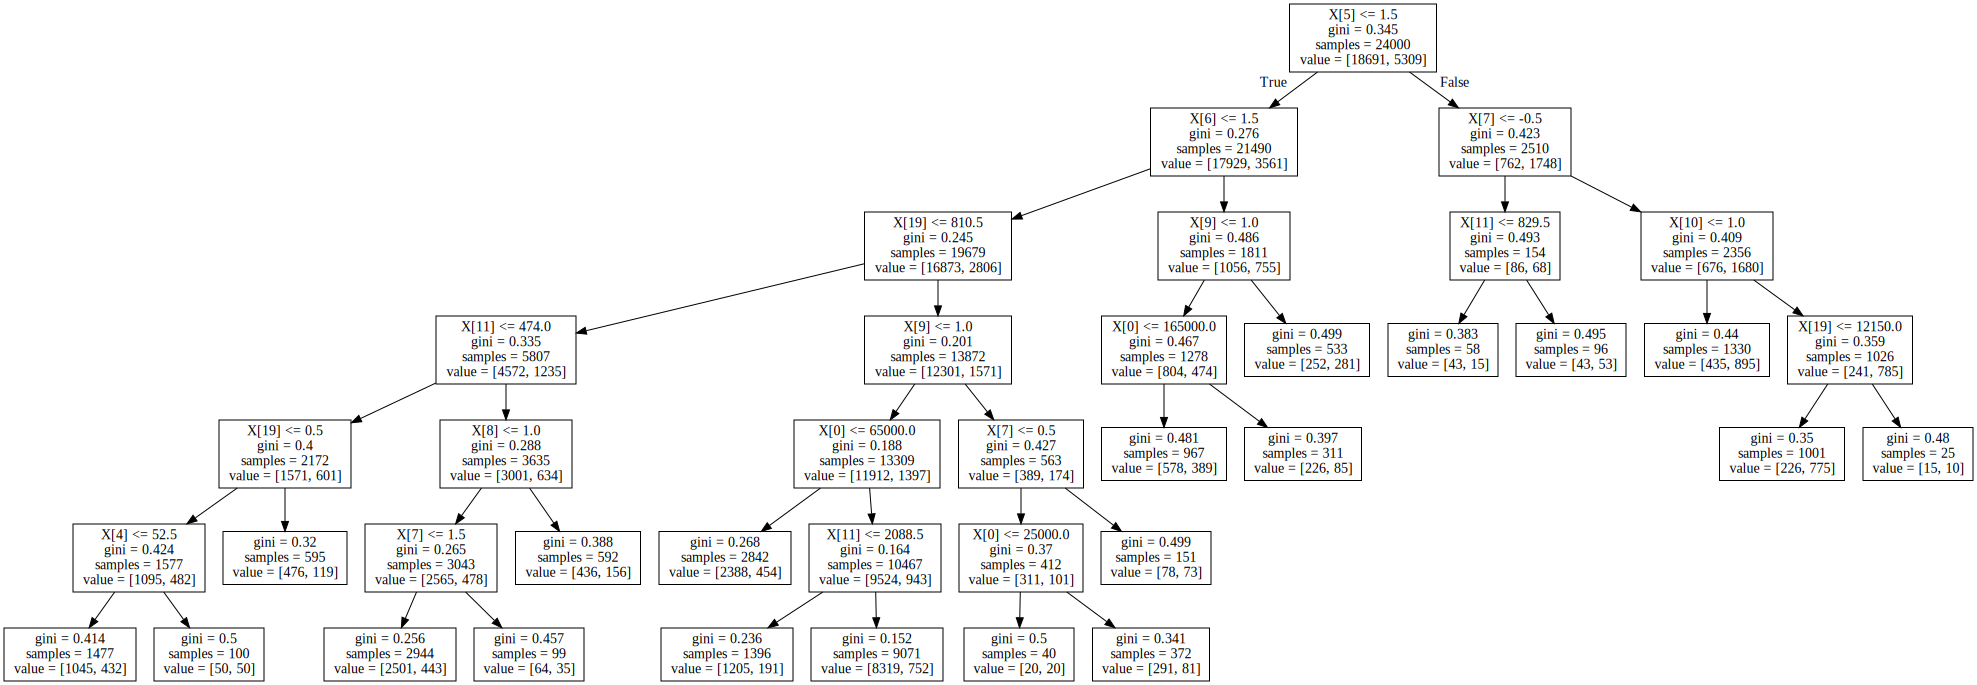

In [ ]:
# Besten DecisionTree grafisch darstellen
dot_data = tree.export_graphviz(best_decision_tree, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

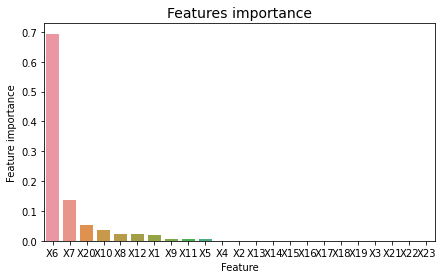

In [ ]:
# Feature Importance grqafisch darstellen
tmp = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': best_decision_tree.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)

s = sns.barplot(x='Feature',y='Feature importance',data=tmp)

plt.show()

#### Begründung für dieses Modell

Ein Desicion Tree wurde gewählt, weil dieser eine sehr gute Vorhersage für Klassifikationsprobleme liefert. Außerdem ist die Ausführung anhand des Baumes nachvollziehbar und verständlich. Als Beispiel wurde oben der Baum dargestellt, um dies zu zeigen.

### Random Forest Classifier

In [ ]:
forest = RandomForestClassifier(random_state = 42, n_jobs = -1, verbose = 8)

In [ ]:
forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.8s


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100building tree 28 of 100

building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.2s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    4.0s


building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=8,
                       warm_start=False)

#### Begründung des Modells
Nach guten Ergebnissen des Decision-Trees war der Gedanke ein ähnliches Modell auszuwählen und die Klassifikation mit diesem zu testen.

## Performanceindikatoren

### Lernkurven

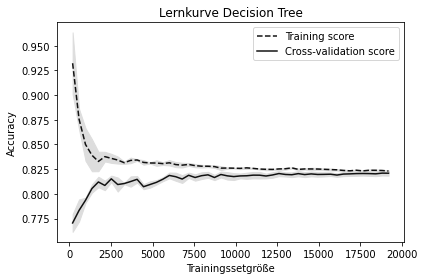

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(grid_tree.best_estimator_, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 50), cv = 5)

# Mittlere- und Standardabweichung
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Linien zeichnen
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Bereiche einzeichnen
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Plot erstellen
plt.title("Lernkurve Decision Tree")
plt.xlabel("Trainingssetgröße"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Aus dieser Kruve lässt sich schließen, dass mehr Daten das Ergebnis der Accuracy nicht verbessern. Weiter ist zu sehen, dass die Kurven sehr nahe zusammen liegen, das bedeutet, dass sich das Modell weder Über- noch Unterangepasst hat

[learning_curve] Training set sizes: [  120  3090  6060  9030 12000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of  10 | elapsed:    0.6s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.7s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    7.2s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    9.1s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.5s finished


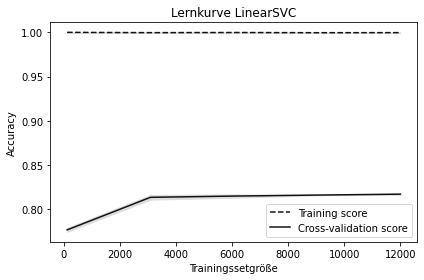

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(forest, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 5), cv = 2, n_jobs = -1, verbose = 8)


# Mittlere- und Standardabweichung
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Linien zeichnen
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Bereiche einzeichnen
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Plot erstellen
plt.title("Lernkurve LinearSVC")
plt.xlabel("Trainingssetgröße"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Aus der Lernkurve des LinearSVC lässt sich schließen, dass dieser stark overfittet und sich sehr gut an das Trainingsmodell angleicht, jedoch dennoch gute Ergebnisse bei dem Cross-validation-Test erzielt.

### Classification Reports

In [ ]:
best_decision_tree.fit(X_train, y_train)
y_predict_test = best_decision_tree.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.66      0.38      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
forest.set_params(verbose = 0)
forest.fit(X_train, y_train)
y_predict_test = forest.predict(X_test)
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



### Confusion Matrizen

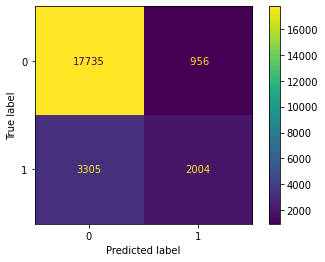

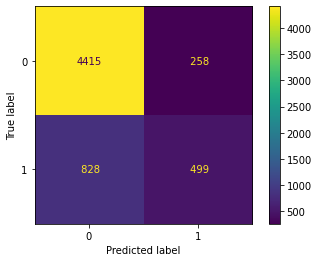

In [ ]:
# Confusionmatrix für DesicionTree erstellen
plot_confusion_matrix(best_decision_tree, X_train, y_train, values_format="4d")
plot_confusion_matrix(best_decision_tree, X_test, y_test, values_format="4d")

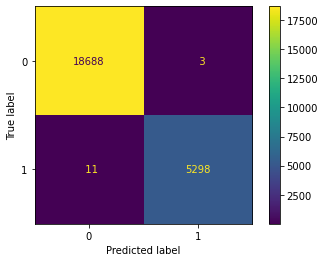

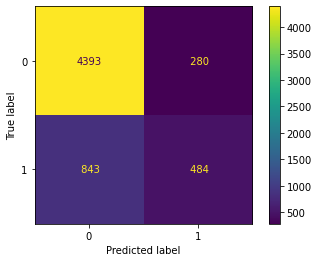

In [ ]:
# Confusion Matrix für Random Forest Classifier erstellen
plot_confusion_matrix(forest, X_train, y_train, values_format="4d")
plot_confusion_matrix(forest, X_test, y_test, values_format="4d")

### Begründung der Performanceindikatioren

Allgemein müssen natürlich Indikatioren betrachtet werden, die für ein Klassifikationsmodell verwendet werden können

Lernkurve: Anhand der Lernkruve können Über- bzw. Unteranpassungen gefunden werden. Außerdem lässt sich ablesen, ab welchem Punkt mehr Daten keinen wesentlichen Vorteil mehr bringen, nämlich ab dem Zeitpunkt, zu dem der Accuracy-Score der Trainingsdaten abflacht.

Confusionmatrix: Für den gegebenen Datensatz ist es sehr wichtig die Fälle zu erkennen, die "False Negative" sind, bei denen es also einen Zahlungsausfall gibt, der nicht vorhergesagt werden konnte. Dieser Wert ist für bspw. Banken relevant und kann mit einer Confusionmatrix leicht identifiziert werden

Precision: Gibt an wie genau die "True-Positives" vorhergesagt werden. Dieser Wert ist auch wieder für unseren Datensatz wichtig, da bei einem zu geringen Wert, der bspow. Bank Kunden verloren gehen könnten. Ebenfalls aus der Confusionmatrix ablesbar, aber als Zahlenwert leichter zu erklären/interpretieren

Recall: Durch diesen Wert wird der prozentuale Wert aller korrekt vorhergesagten postitiven Vorhersagen angegeben. Wie bereits vorher erwähnt, ist es besonders wichtig, die Zahlungsausfälle ("Postives") zu erkennen. Dafür ist dieser Wert ebenso ein sinnvoller Perfomanceindikator.

F1-Score: Der f1-Score berechnet sich aus der Precision und dem Recall und ist sinnvoll für eine ausgewogene Bewertung von Precision und Recall. Ausßerdem ist er nicht anfällig für sehr viele True-Negatives, so wie es auch in diesem Datensatz der Fall ist.

Accuracyscore: Diesen Score haben wir gewählt, weil er sehr leicht zu interpretieren und zu verstehen ist. Er gibt einen guten ersten Eindruck über das Modell. Aber es wurde auch darauf geachtet detailliertere Indikatoren zu verwenden.

## Fazit
Abschließend lässt sich sagen, dass beide Modelle ähnlich gute Performances bei der Klassifizierung der Testdaten erzielen, jedoch der Random Forest Classifier bei der Klassifizierung der Trainingsdaten stark overfittet.

Aufgrund der Trainingsgeschwindigkeit und der Verständlichkeit raten wir daher in diesem Fall zum Decision-Tree Classifier. 